# Class 4 - Tree-based models

In [1]:
!pip install pandas_profiling

In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None 

e:\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Downloading and pre-processing dataset**

We'll use IMDB 5000 Movies dataset in the analysis

In [3]:
dataset = pd.read_csv("IMDB.csv")
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Comprehensive data report may be generated using `pandas_profiling` package - **IMDB_Report.zip** contains profiling report for IMDB dataset. More information about the package can be found on [Pandas-profiling official docs](https://pandas-profiling.ydata.ai/docs/master/)

In [4]:
profile = ProfileReport(dataset, title = "IMDB Movies Profiling Report")

In [5]:
profile.to_file(output_file = "IMDB_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]e:\python\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
Summarize dataset:  72%|███████▎  | 29/40 [00:05<00:01, 10.40it/s, Calculate auto correlation]                 e:\python\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
Summarize dataset:  75%|███████▌  | 30/40 [00:08<00:02,  3.44it/s, Calculate spearman correlation]e:\python\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select 

In [6]:
#Inspecting columns
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
#Checking numeric columns
dataset.describe(include = [np.number])

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [8]:
#Checking nominal columns
dataset.describe(include = ['O']) 

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [9]:
#Dropping columns with many unique values and imbalanced classes
dataset.drop(['color', 'director_name', 'actor_2_name', 'actor_1_name',
             'movie_title', 'actor_3_name', 'plot_keywords',
             'movie_imdb_link', 'language', 'country', 'content_rating'],
             axis = 1, inplace = True)

In [10]:
#Drop duplicates
print(dataset.shape)
dataset.drop_duplicates(inplace = True)
print(dataset.shape)

(5043, 17)
(4998, 17)


In [11]:
#Check null values
dataset.isnull().sum()

num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        874
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [12]:
#Dropping missing values
dataset.dropna(inplace = True)
dataset.shape

(3768, 17)

**Initial EDA (Exploratory Data Analysis)**

In [13]:
numeric_dataset = dataset.drop("genres", axis = 1)

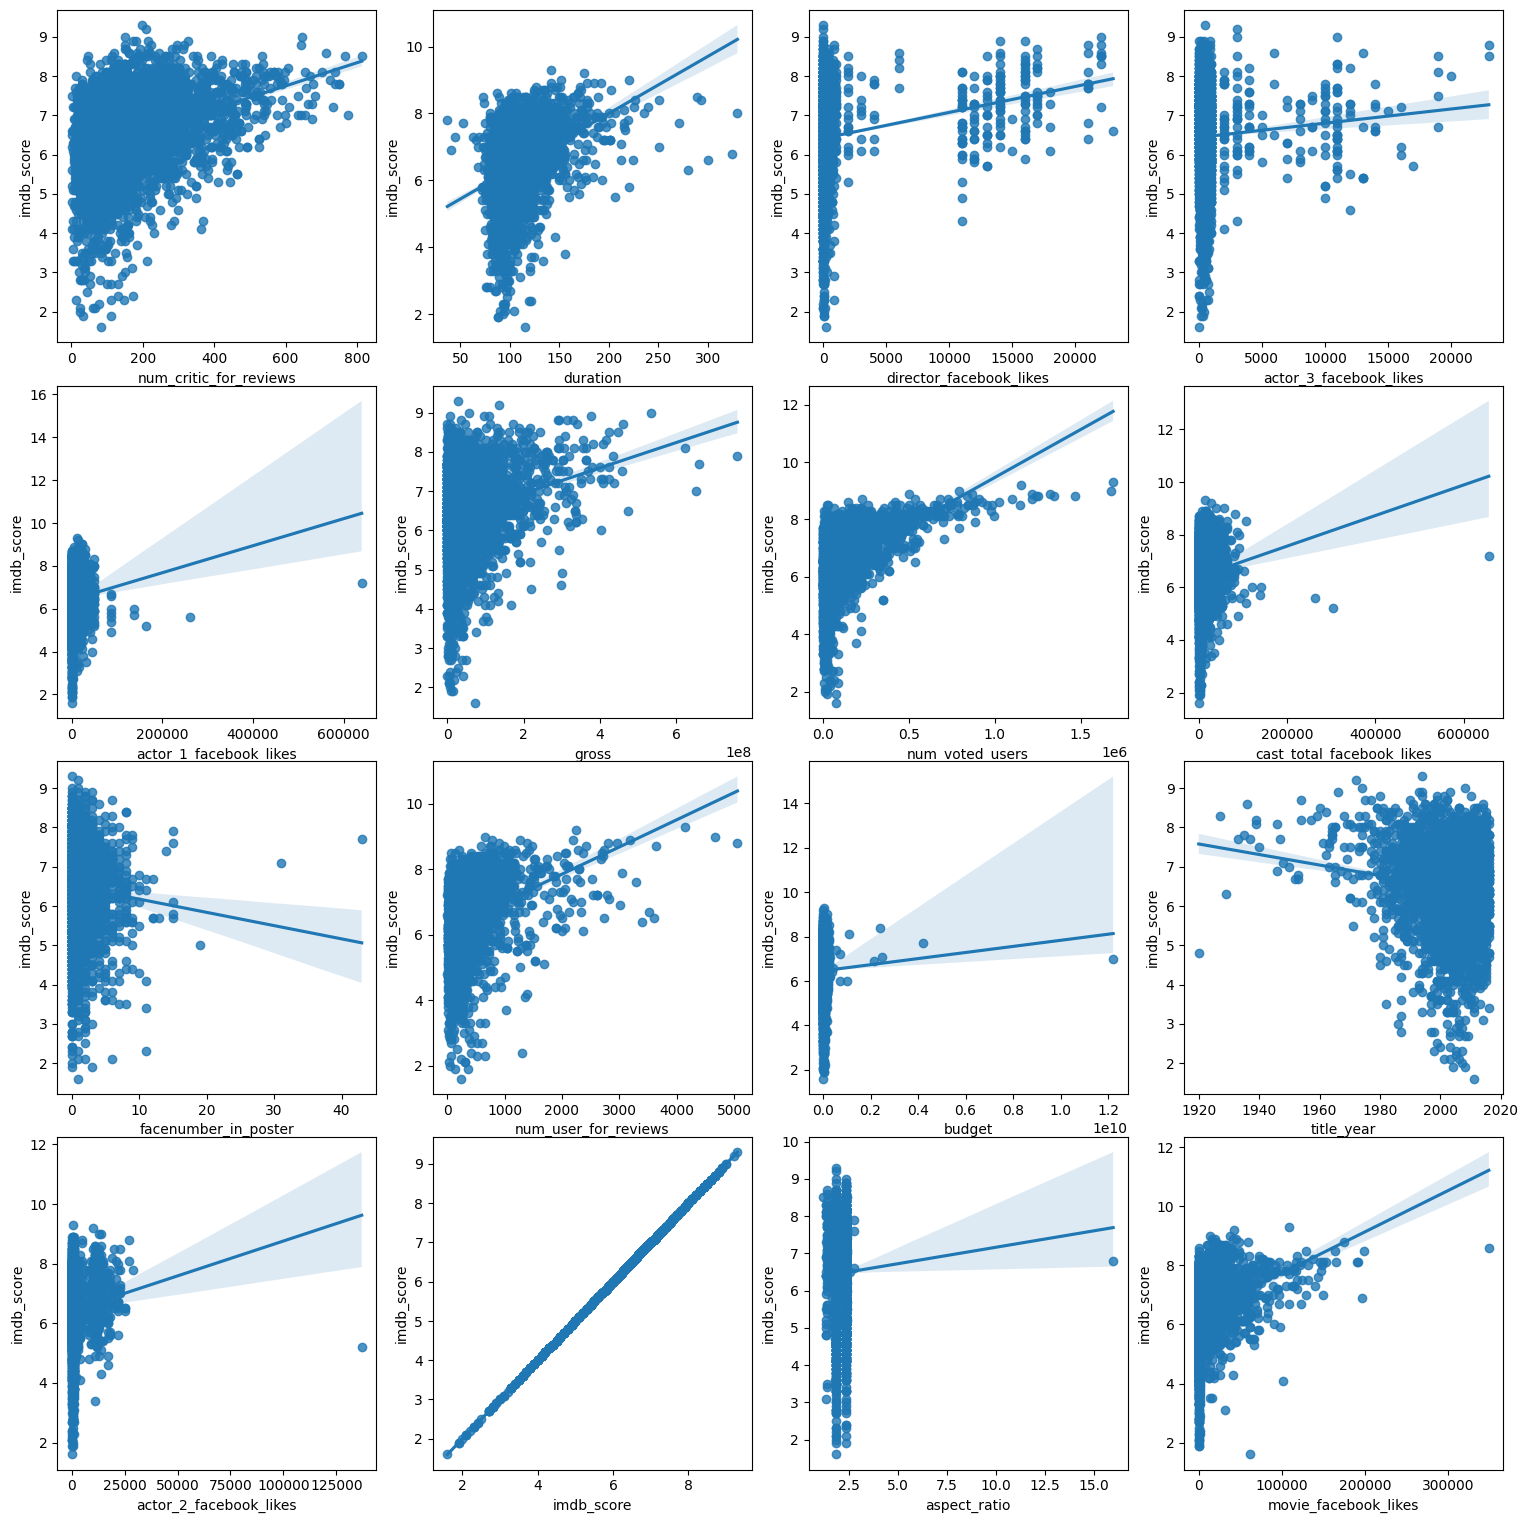

In [14]:
f, axes = plt.subplots(4, 4, figsize = [15, 15])
plt.tight_layout(pad = 0.4, w_pad = 1.0, h_pad = 1.0)
for n,col in enumerate(numeric_dataset):
    sns.regplot(x = col, y = "imdb_score", data = dataset, ax = axes[n//4, n%4])

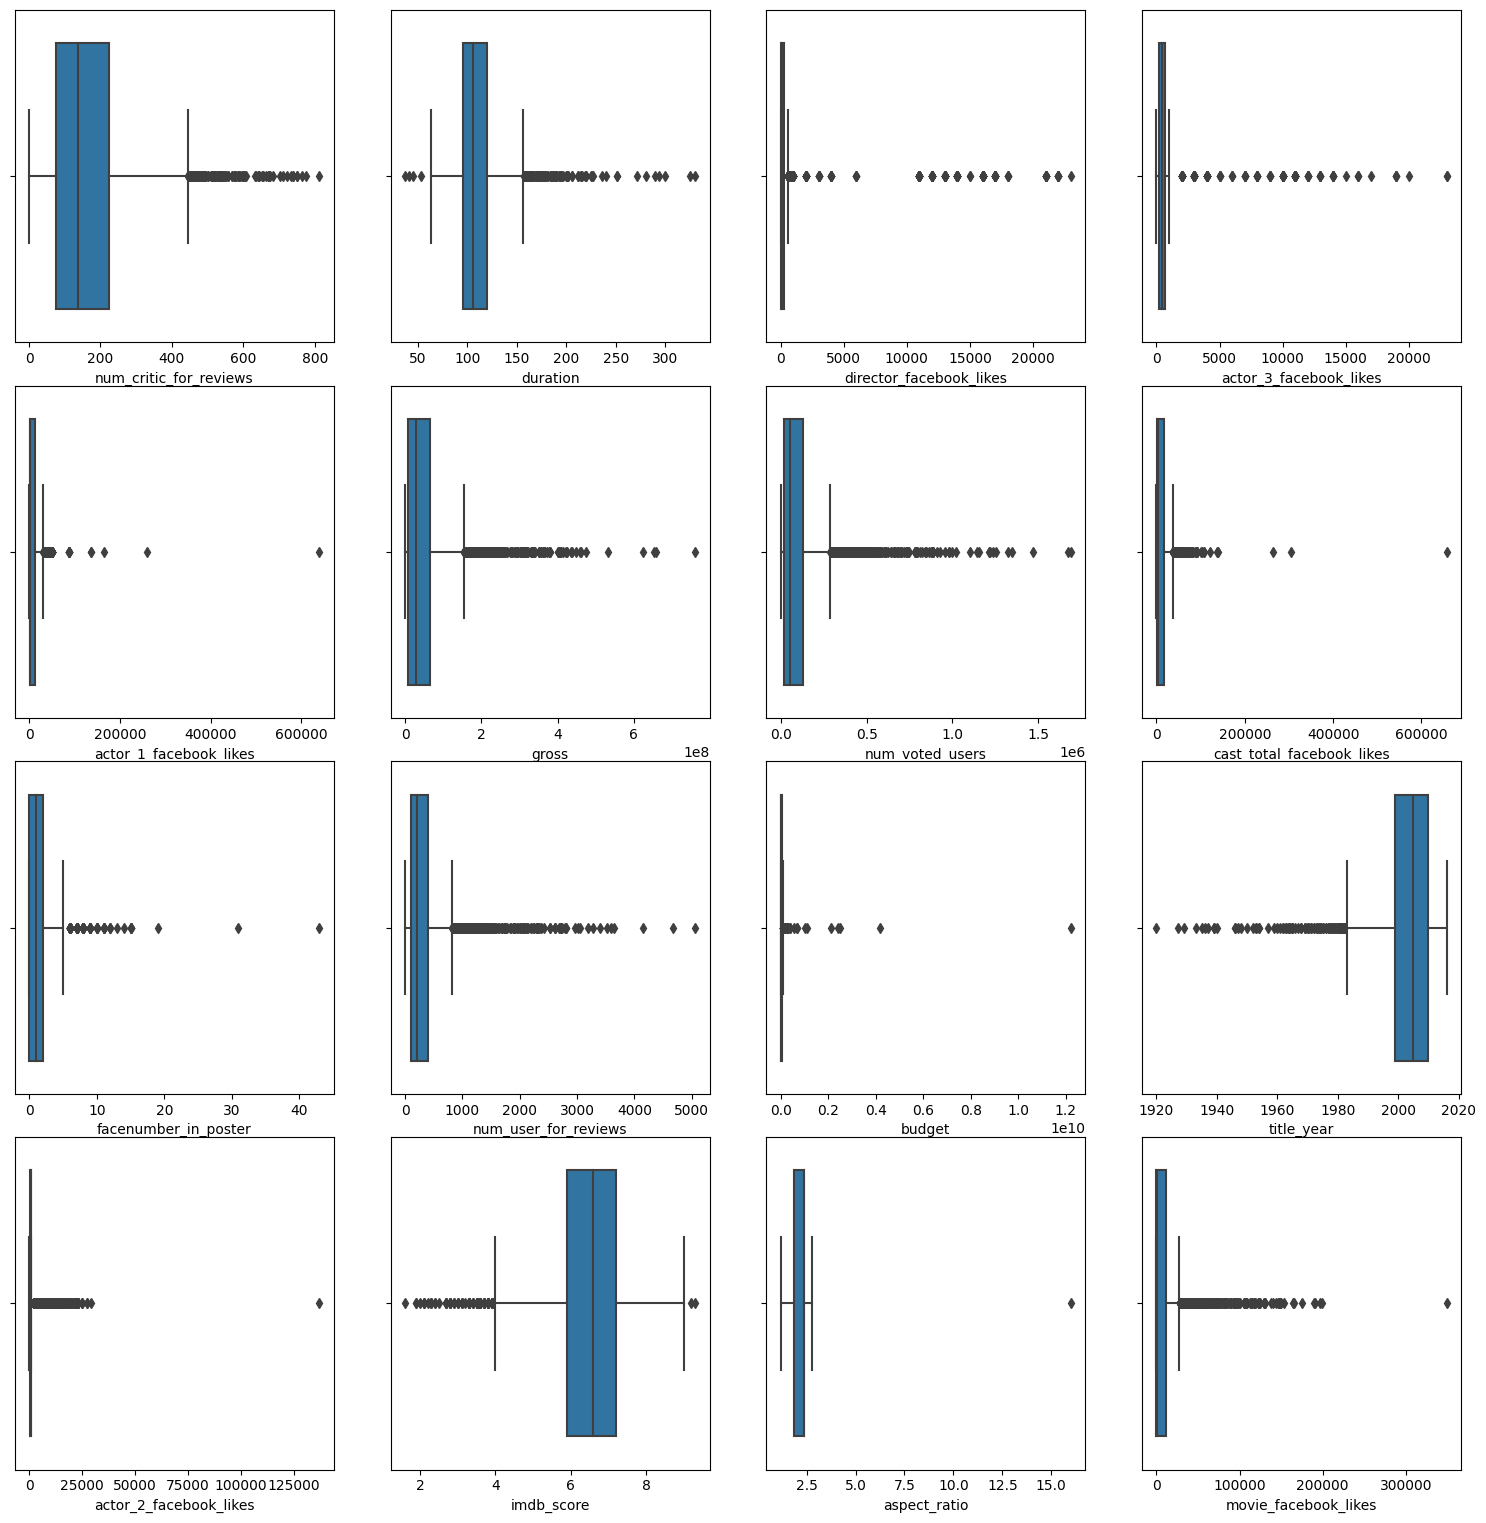

In [15]:
f, axes = plt.subplots(4, 4, figsize = [15,15])
plt.tight_layout(pad = 0.4, w_pad = 1.0, h_pad = 1.0)
for n,col in enumerate(numeric_dataset):
    sns.boxplot(x = col, data = dataset, ax = axes[n//4, n%4])

**Detecting outliers**

A raw score x is converted into a standard score by

$$ z= \frac{x-\mu}{\sigma}  $$

where:

* μ is the mean of the population,
* σ is the standard deviation of the population.

In [16]:
stats.zscore(numeric_dataset)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.516365,2.983953,-0.261867,0.052422,-0.430413,10.181748,5.177046,-0.344030,-0.67011,6.640315,0.847268,0.603860,-0.234013,1.358907,-0.934081,1.115987
1,1.105791,2.587778,-0.077813,0.130430,2.088356,3.700280,2.429061,1.942246,-0.67011,2.209195,1.126507,0.402991,0.667095,0.600574,0.680176,-0.431892
2,3.536129,1.663370,-0.261867,-0.320942,0.215425,2.129417,1.135459,0.016701,-0.18379,1.613824,0.882727,1.206467,-0.354412,0.316199,0.680176,3.555069
3,5.245466,2.367681,6.930308,11.966172,1.248766,5.693514,6.886378,5.010981,-0.67011,5.778979,0.904888,0.905164,4.658227,1.927657,0.680176,7.260597
5,2.401971,0.959059,-0.106582,-0.122424,-0.453664,0.304447,0.713882,-0.499597,-0.18379,0.989172,0.965612,0.905164,-0.301419,0.126615,0.680176,0.693838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,-0.822277,-0.889758,-0.132081,-0.407558,-0.494674,-0.735585,-0.661151,-0.597739,-0.67011,-0.748139,-0.203158,-0.300051,-0.441552,0.979740,-0.735839,-0.399199
5029,-0.708861,0.034650,-0.241598,-0.404330,-0.489249,-0.743907,-0.649476,-0.591960,-0.67011,-0.689578,-0.198770,-0.601355,-0.438670,0.884948,-0.735839,-0.393570
5033,-0.182288,-1.462011,-0.166734,-0.403254,-0.476203,-0.739163,-0.210305,-0.578668,-0.67011,0.093676,-0.203171,0.101687,-0.431574,0.505782,-0.735839,0.459311
5035,-0.887086,-1.285933,-0.261867,-0.404330,-0.487183,-0.715942,-0.346610,-0.590279,-0.67011,-0.494374,-0.203171,-1.103527,-0.437117,0.410990,-2.095214,-0.431892


In [17]:
#Removing outliers
dataset = dataset[(np.abs(stats.zscore(numeric_dataset)) < 9).all(axis = 1)]
dataset.shape

(3743, 17)

**Feature engineering**

In [18]:
# Splitting genres column values
dataset['genres'] = dataset.genres.str.split("|")
dataset['genres']

1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
5                             [Action, Adventure, Sci-Fi]
6                            [Action, Adventure, Romance]
7       [Adventure, Animation, Comedy, Family, Fantasy...
                              ...                        
5027                                              [Drama]
5029                   [Crime, Horror, Mystery, Thriller]
5033                            [Drama, Sci-Fi, Thriller]
5035            [Action, Crime, Drama, Romance, Thriller]
5042                                        [Documentary]
Name: genres, Length: 3743, dtype: object

In [19]:
# Getting distinct categories
categories = set(dataset.genres.explode())
categories

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [20]:
# One-hot encode each movie's classification
for cat in categories:
    dataset[cat] = dataset.genres.apply(lambda s: int(cat in s))
dataset.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,Thriller,Crime,Animation,Comedy,Biography,Family,Drama,Romance,Horror,Mystery
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,"[Action, Adventure, Fantasy]",471220,48350,0.0,...,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,"[Action, Adventure, Thriller]",275868,11700,1.0,...,1,0,0,0,0,0,0,0,0,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,"[Action, Adventure, Sci-Fi]",212204,1873,1.0,...,0,0,0,0,0,0,0,0,0,0
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,"[Action, Adventure, Romance]",383056,46055,0.0,...,0,0,0,0,0,0,0,1,0,0
7,324.0,100.0,15.0,284.0,799.0,200807262.0,"[Adventure, Animation, Comedy, Family, Fantasy...",294810,2036,1.0,...,0,0,1,1,0,1,0,1,0,0


In [21]:
#Drop genres column
dataset.drop('genres', axis = 1, inplace = True)

**EDA on cleaned data**

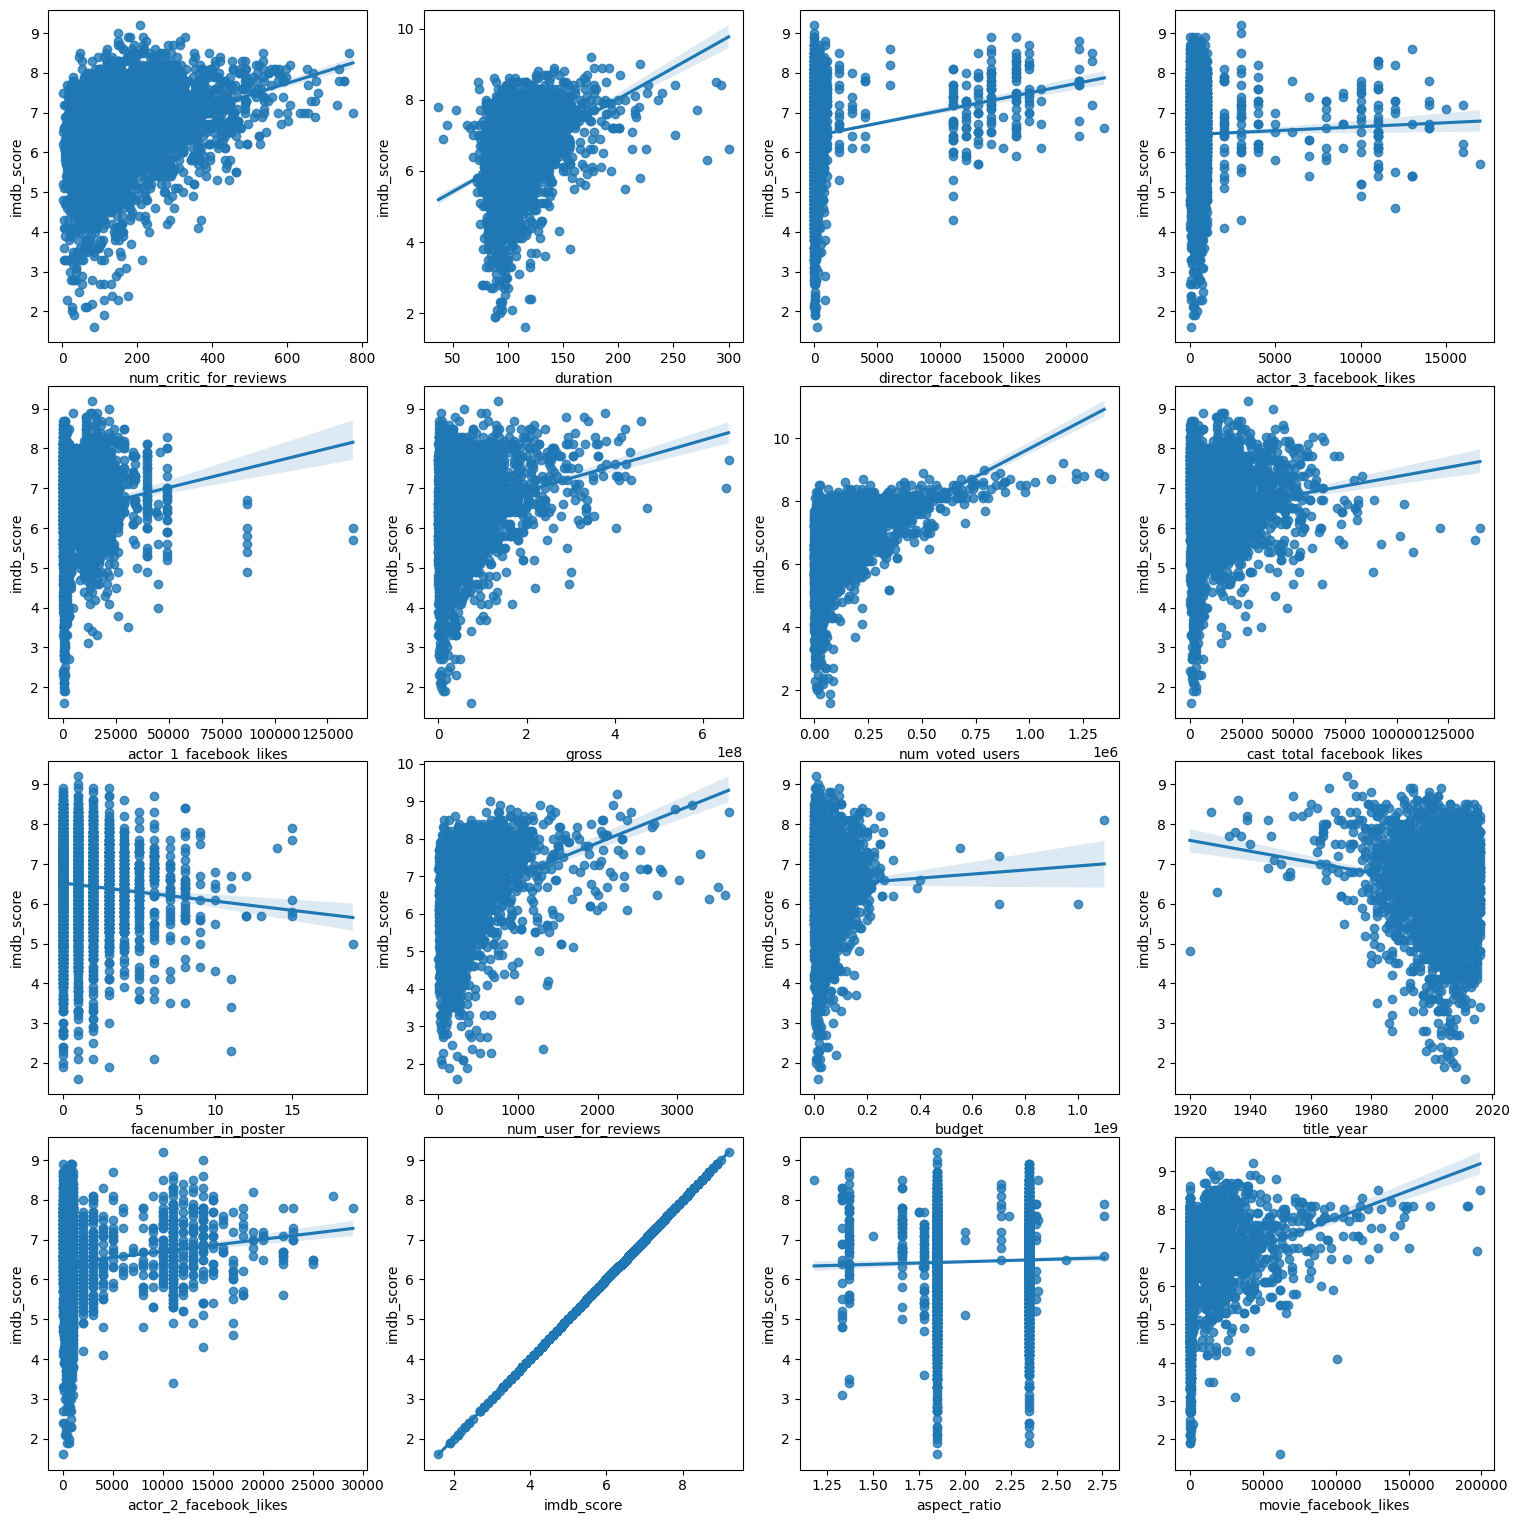

In [22]:
f, axes = plt.subplots(4, 4, figsize = [15, 15])
plt.tight_layout(pad = 0.4, w_pad = 1.0, h_pad = 1.0)
for n,col in enumerate(dataset.columns[0:16]):
    sns.regplot(x = col, y = "imdb_score", data = dataset, ax = axes[n//4, n%4])

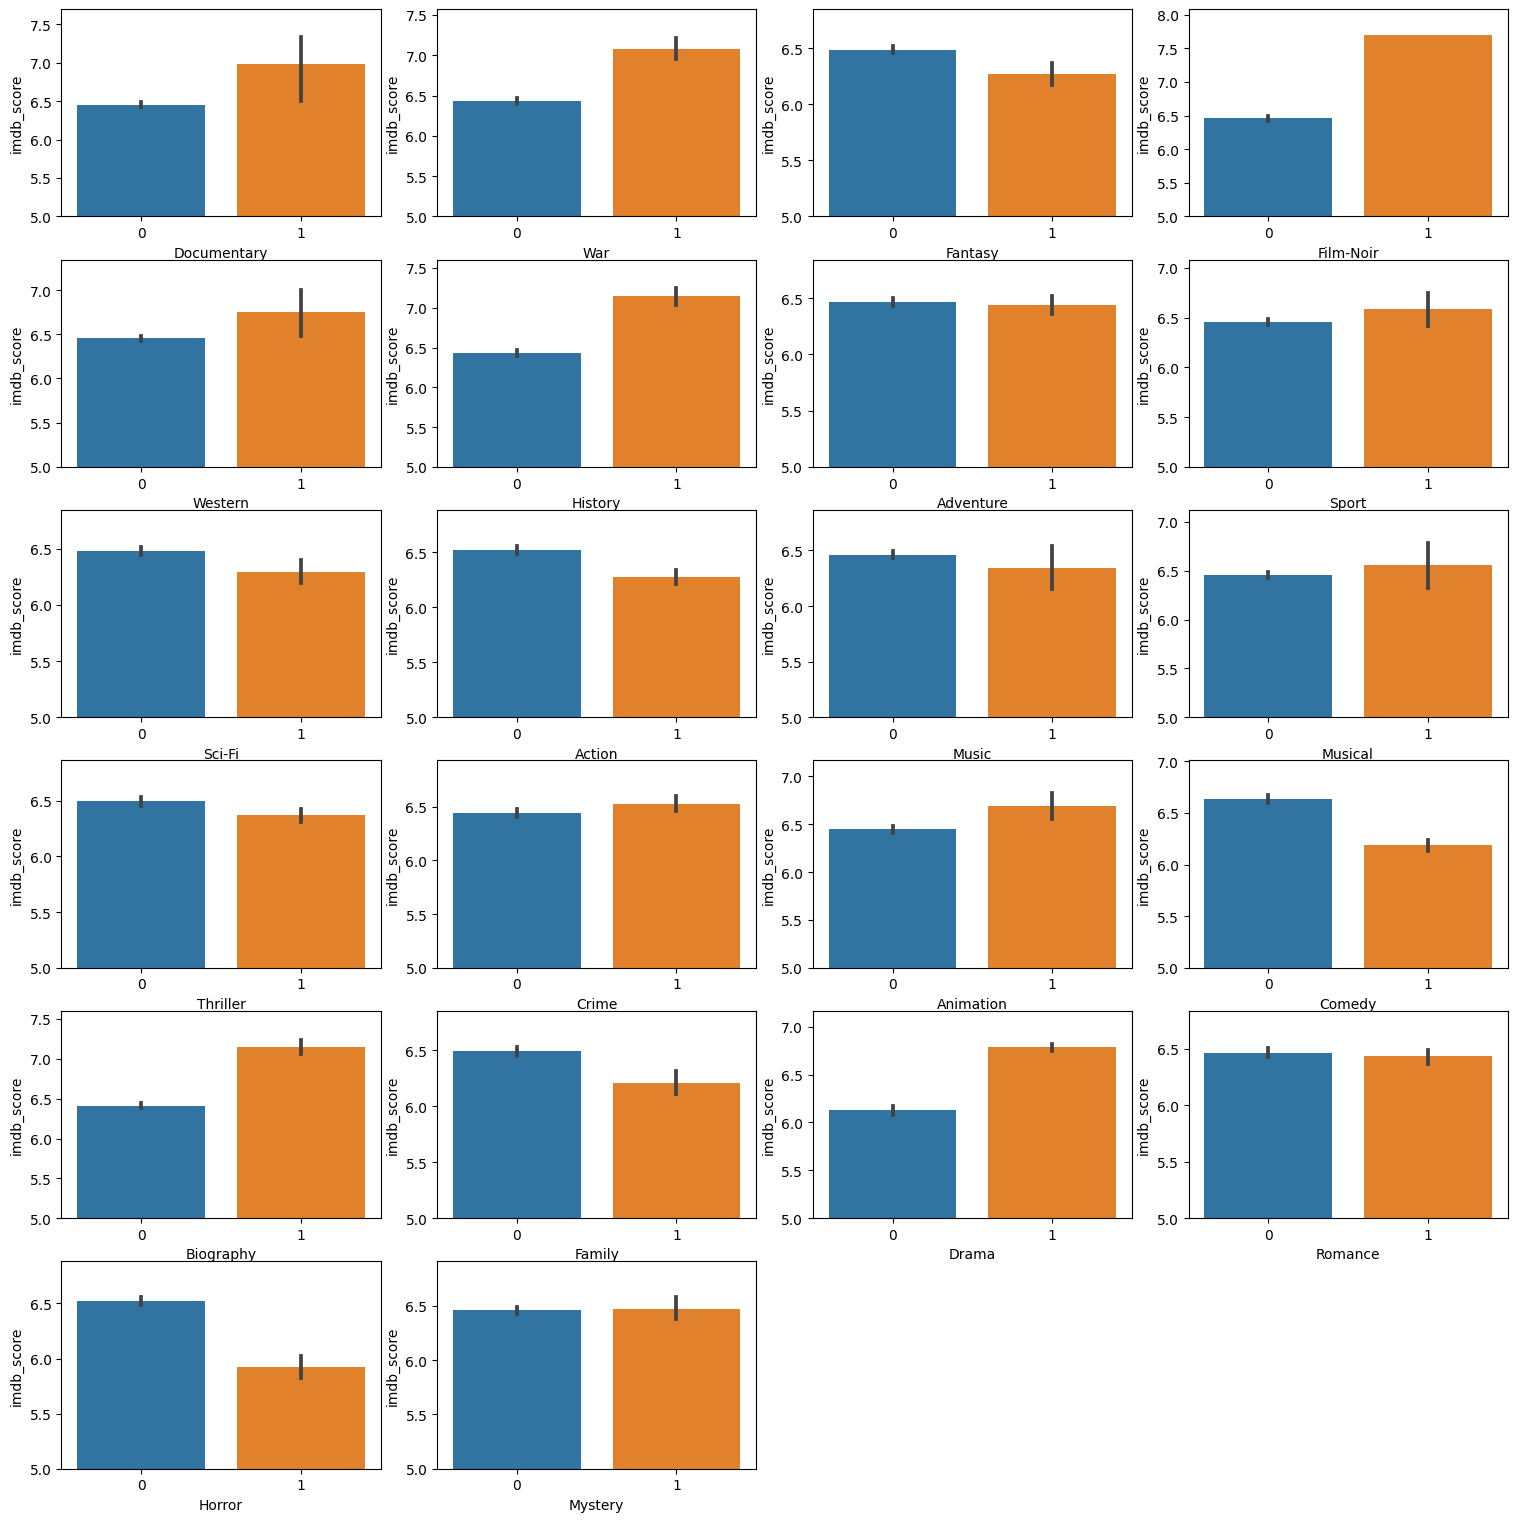

In [23]:
f, axes = plt.subplots(6, 4, figsize = [15, 15])
plt.tight_layout(pad = 0.4, w_pad=1.0, h_pad = 1.0)
for n, col in enumerate(dataset.columns[16:]):
    sns.barplot(x = col, y = "imdb_score", data = dataset, ax = axes[n//4, n%4]).set_ylim(5,)
f.delaxes(axes[5, 2]); f.delaxes(axes[5, 3]);

**Splitting data into train and test subsets**

In [24]:
X = dataset.drop('imdb_score', axis = 1)
y = dataset['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 42)

**Decision Trees**

From: [sklearn docs](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)

_What are all the various decision tree algorithms and how do they differ from each other? Which one is implemented in scikit-learn?_

**ID3** (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

**C4.5** is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

**C5.0** is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

**CART** (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

**scikit-learn uses an optimised version of the CART algorithm**

CART algorithm pick variables and cutoff threshold using:
 1. __for classification__: minimization of node's heterogeneity (Gini index or entropy) 
 2. __for regression__: minimizing error of prediction (e.g. sum of squares of residuals)

In [25]:
from sklearn import tree
from matplotlib.pyplot import figure

In [26]:
CART = tree.DecisionTreeRegressor(random_state = 42, ccp_alpha = 0.0)
CART_model = CART.fit(X_train, y_train)

In [27]:
CART_model.get_depth()

28

In [28]:
CART_model.get_n_leaves()

2598

**Pruning CART tree (cost based)**

[Minimal Cost-Complexity Pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)

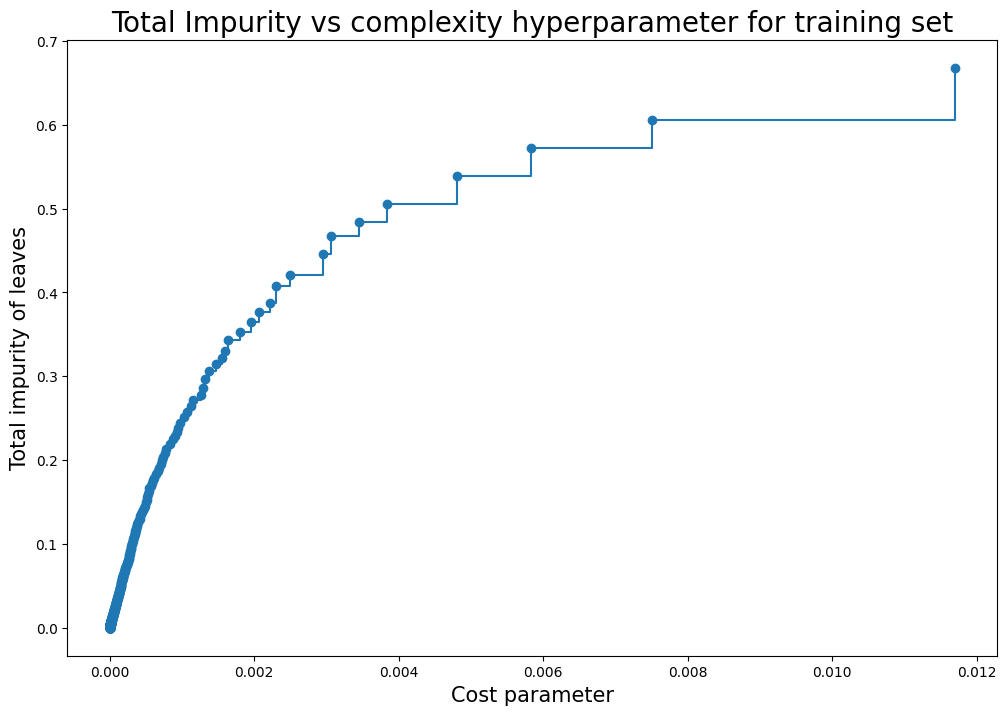

In [29]:
path = CART.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas[::5], path.impurities[::5]
figure(figsize = (12, 8))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = "steps-post")
plt.xlabel("Cost parameter", fontsize = 15)
plt.ylabel("Total impurity of leaves", fontsize = 15)
plt.title("Total Impurity vs complexity hyperparameter for training set", fontsize = 20);

In [30]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state = 42, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [31]:
for order, ind in [('First', 0), ('Last', -1)]:
    print(f"{order} tree with ccp_alpha: {ccp_alphas[ind]:.2f}, " +
          f"nodes: {clfs[ind].tree_.node_count}, leaves: {clfs[ind].get_n_leaves()}")

First tree with ccp_alpha: 0.00, nodes: 5195, leaves: 2598
Last tree with ccp_alpha: 0.03, nodes: 7, leaves: 4


In [32]:
def RMSE(model, X, y):
    return np.sqrt(((model.predict(X) - y)**2).mean())

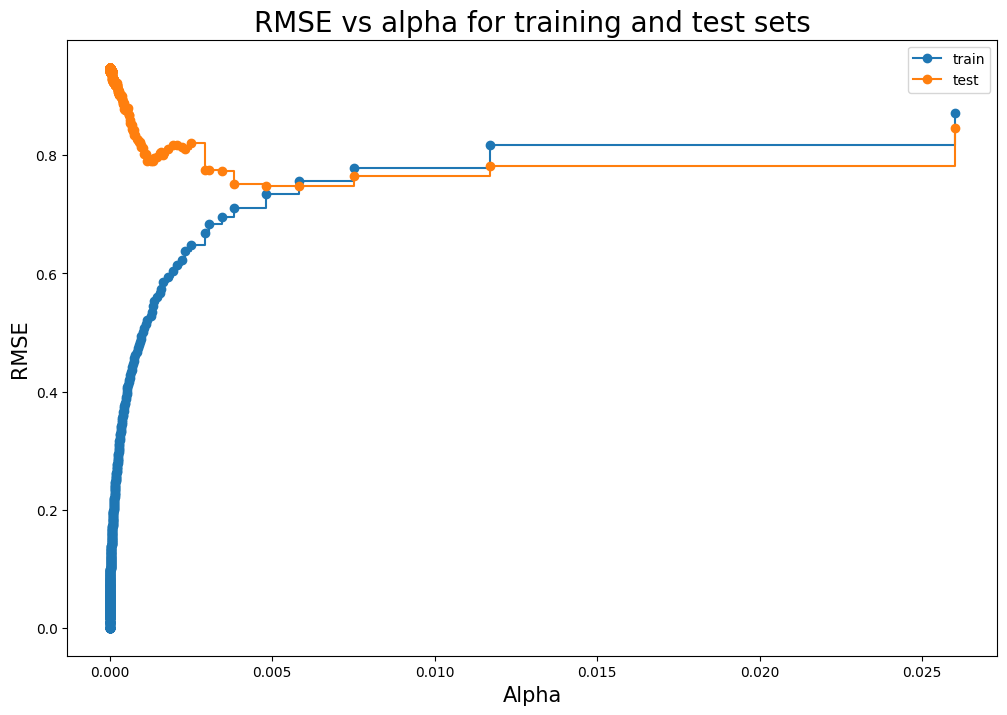

In [33]:
test_scores = [RMSE(clf, X_test, y_test) for clf in clfs]
train_scores = [RMSE(clf, X_train, y_train) for clf in clfs]

fig, ax = plt.subplots(figsize = [12, 8])
ax.set_xlabel("Alpha", fontsize = 15)
ax.set_ylabel("RMSE", fontsize = 15)
ax.set_title("RMSE vs alpha for training and test sets", fontsize = 20)
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [34]:
#Complexity (cost) that produce the best regression tree
Best_CART = clfs[np.argmin(test_scores)]
Best_CART.ccp_alpha

0.004814753708259074

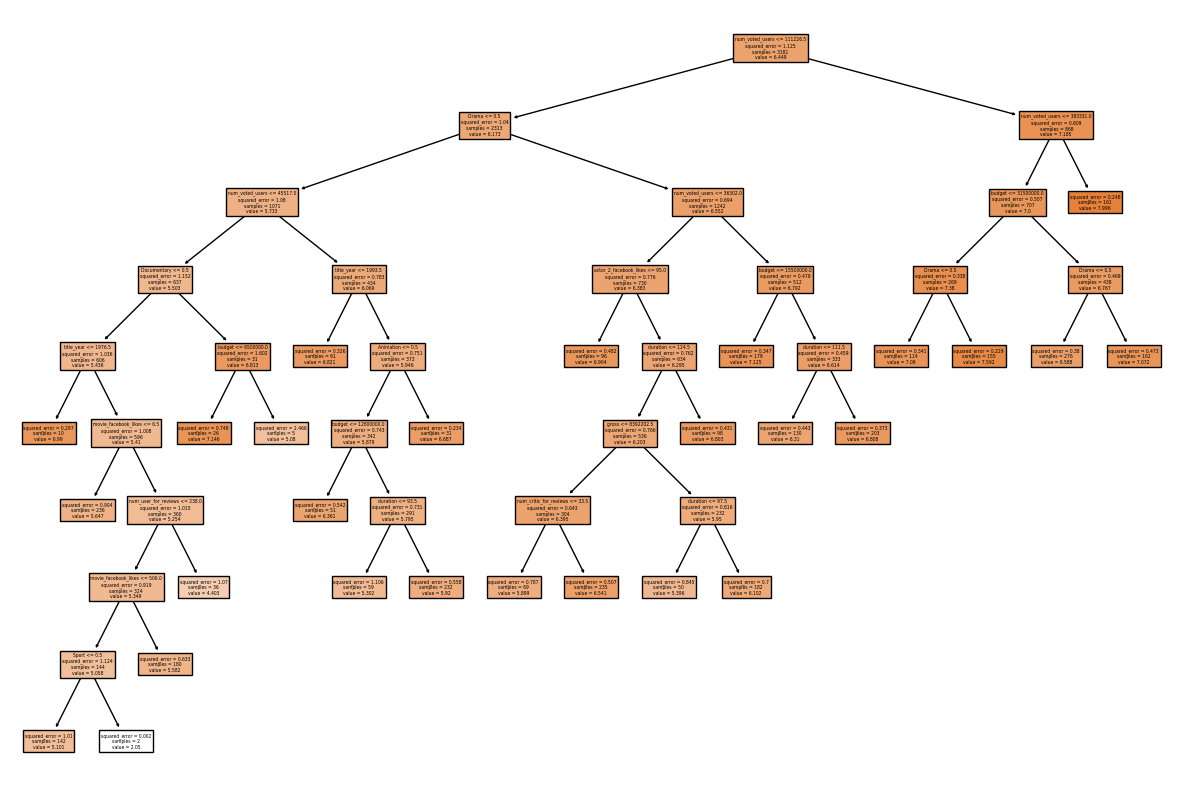

In [35]:
#Visualize the tree
plt.figure(figsize = (15, 10))
_ = tree.plot_tree(Best_CART, #clfs[-1] 
                   feature_names = X_train.columns,  
                   filled = True)

In [36]:
#RMSE of the best tree
min(test_scores)

0.7478998791977479

In [37]:
#But we can view this as multiclass classification
confmat = pd.crosstab(Best_CART.predict(X_test).round(), y_test.round())
confmat

imdb_score,3.0,4.0,5.0,6.0,7.0,8.0,9.0
row_0,,,,,,,
4.0,1,2,2,0,2,0,0
5.0,1,3,9,16,3,0,0
6.0,2,11,37,96,44,5,0
7.0,0,1,8,75,137,58,0
8.0,0,0,0,1,14,30,4


In [38]:
#Accuracy
np.array([confmat.loc[i,i] for i in confmat.index]).sum()/confmat.sum().sum()

0.4875444839857651

### Ensemble tree-based methods

[Ensemble learning](https://scikit-learn.org/stable/modules/ensemble.html) helps improve final model performance by combining results of underlying models (e.g. random forest is combination of decision trees).

Two families of ensemble methods are usually distinguished:

- In **averaging methods**, the main principle is to build several estimators **independently** and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator.

> Example: Random forests

- By contrast, in **boosting methods**, base estimators are built **sequentially** and the following models tries to reduce the error of the combined estimator.

> Example: Boosted trees

<img src="https://hpccsystems.com/wp-content/uploads/2022/09/LearningTrees-1.png" width=500>

[Source](https://hpccsystems.com/resources/learning-trees-a-guide-to-decision-tree-based-machine-learning/)

In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

**Random forests**

https://scikit-learn.org/stable/modules/ensemble.html#random-forests

Random forest is a collection of 'weak' decision trees providing good performance together.

Trees are weakned using multiple techniques:
* bootstrap sample, potentially on subset of available data
* limiting number of features
* no pruning

We'll look on two parameters in `RandomForestRegressor` class:
- n_estimators - number of trees built in ensemble
- max_features - how many features will be included in each tree e.g.
    - 'auto' - all
    - 'sqrt' - random sample of sqrt(n_features)
    - n - random sample of 'n' features

In [40]:
#Checking number of tress influence on RMSE
rfr = RandomForestRegressor
N = [10, 50, 100, 200, 300, 400, 500]
RMSE_RF= [RMSE(rfr(n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in N]

Minimum for 300 trees


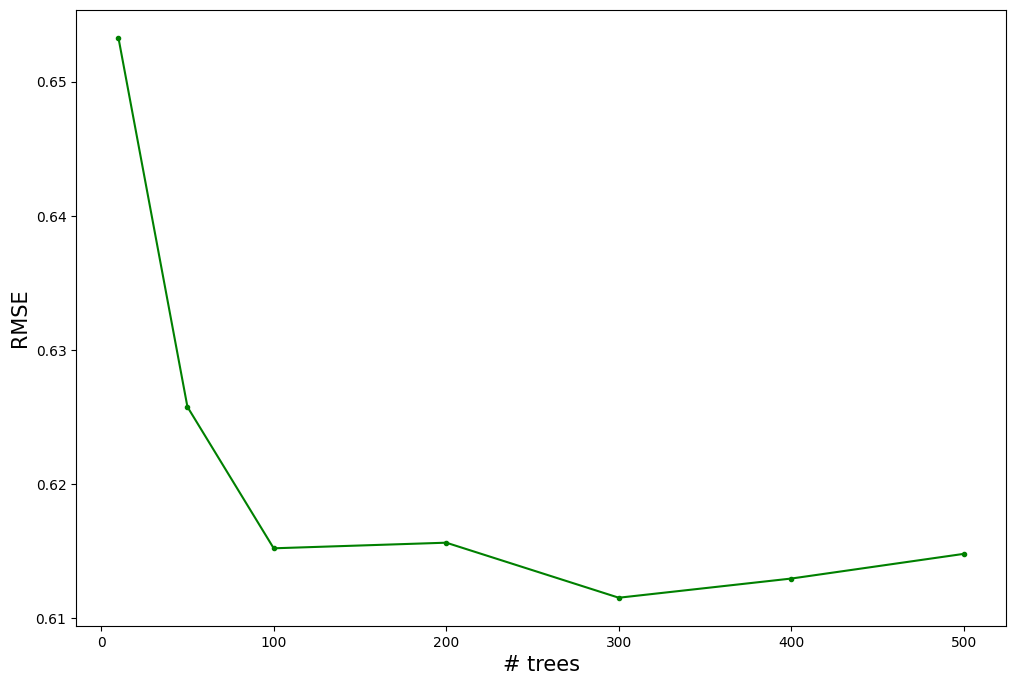

In [41]:
figure(figsize = (12, 8))
plt.plot(N, RMSE_RF, '.-', color = 'g');
plt.xlabel("# trees", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
print("Minimum for", N[np.argmin(RMSE_RF)], "trees")

In [42]:
#Checking number of features influence on RMSE
features = np.linspace(1, X_train.shape[1], 10).astype(int)
RMSE_RF_features= [RMSE(rfr(400, max_features = n, n_jobs = -1).fit(X_train, y_train), X_test, y_test) for n in features]

Minimum for 13 features


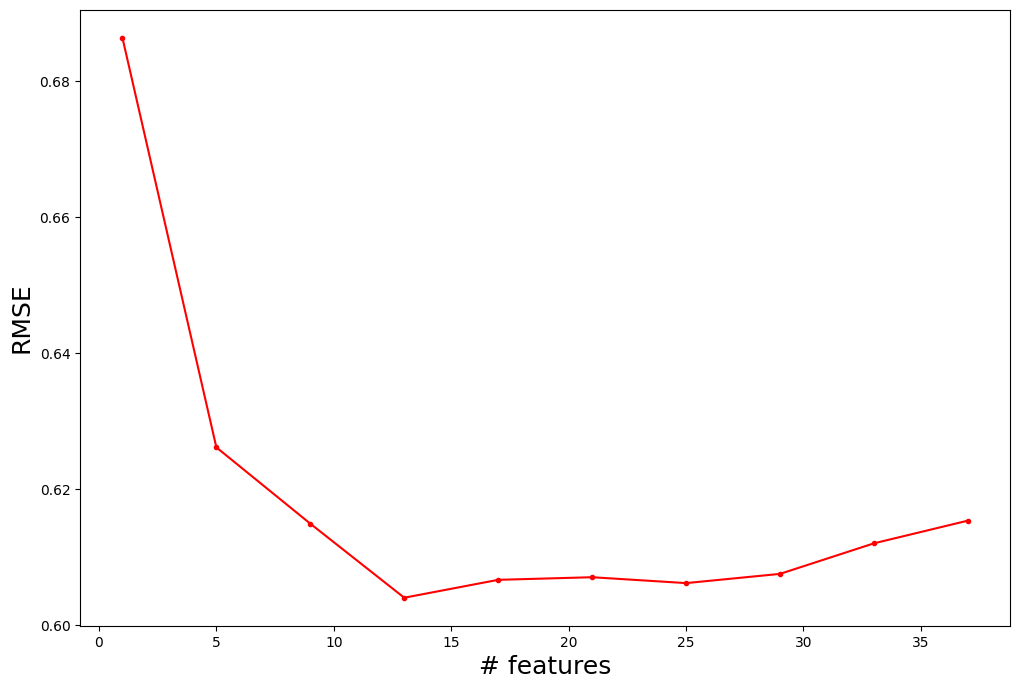

In [43]:
figure(figsize = (12, 8))
plt.plot(features, RMSE_RF_features, '.-', color = 'r');
features[np.argmin(RMSE_RF_features)]
plt.xlabel("# features", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", features[np.argmin(RMSE_RF_features)], "features")

**How to handle the uncertainty in picking optimal values of hyperparameters?**

[Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

![](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)

In [44]:
Best_RF = RandomForestRegressor(400, max_features = 25, n_jobs = -1).fit(X_train, y_train)

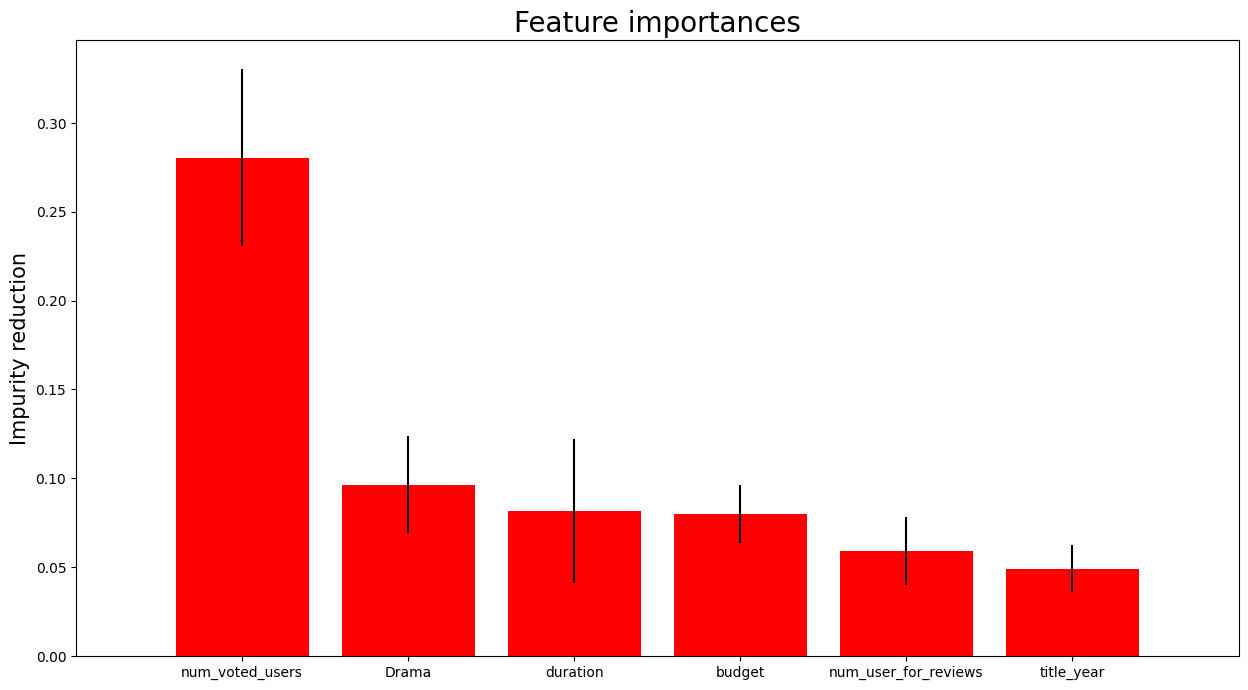

In [45]:
# Plot the feature importances of the forest
importances = Best_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in Best_RF.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

num_feat = 6
plt.figure(figsize = [15, 8])
plt.title("Feature importances", fontsize = 20)
plt.bar(range(num_feat)[:num_feat], importances[indices][:num_feat],
       color = "r", yerr = std[indices][:num_feat], align = "center")
plt.xticks(range(num_feat)[:num_feat], X_train.columns[indices[:num_feat]])
plt.xlim([-1, num_feat])
plt.ylabel("Impurity reduction", fontsize = 15)
plt.show()

[**Gradient Boosted Trees**](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)

Minimum for 400 trees


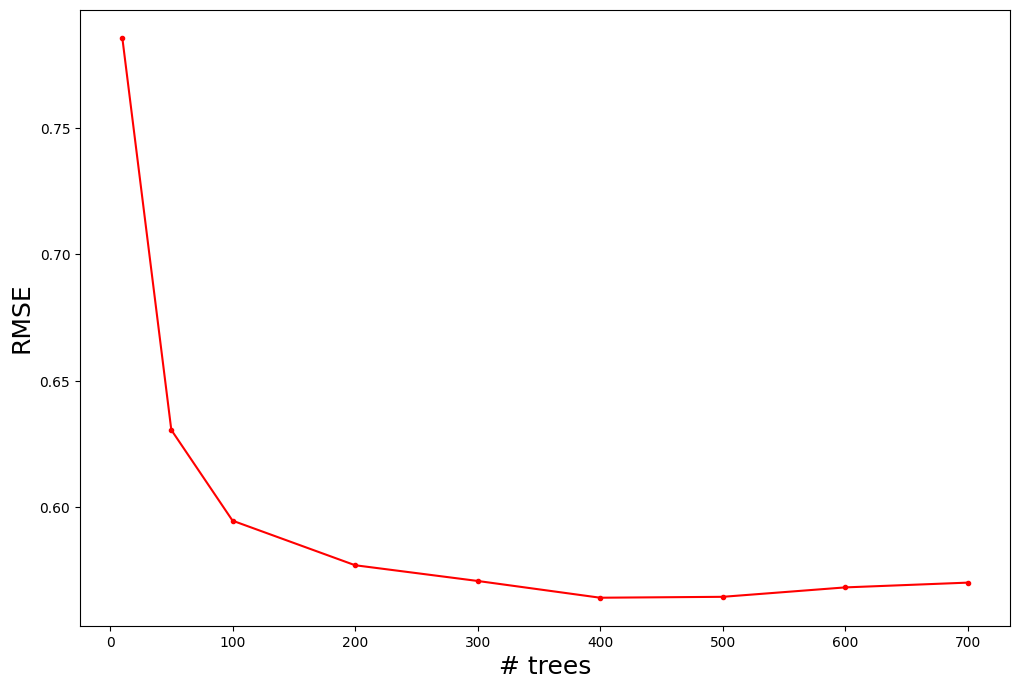

In [46]:
#Checking number of tress influence on RMSE
gbr = GradientBoostingRegressor
N = [10, 50, 100, 200, 300, 400, 500, 600, 700]
RMSE_GBT = [RMSE(gbr(n_estimators = n).fit(X_train, y_train), X_test, y_test) for n in N]

figure(figsize = (12, 8))
plt.plot(N, RMSE_GBT, '.-', color = 'r');
plt.xlabel("# trees", fontsize = 18)
plt.ylabel("RMSE", fontsize = 18)
print("Minimum for", N[np.argmin(RMSE_GBT)], "trees")

In [47]:
#From 500 trees RMSE reduction is insignificant
Best_GBT = GradientBoostingRegressor(n_estimators = 500).fit(X_train,y_train)

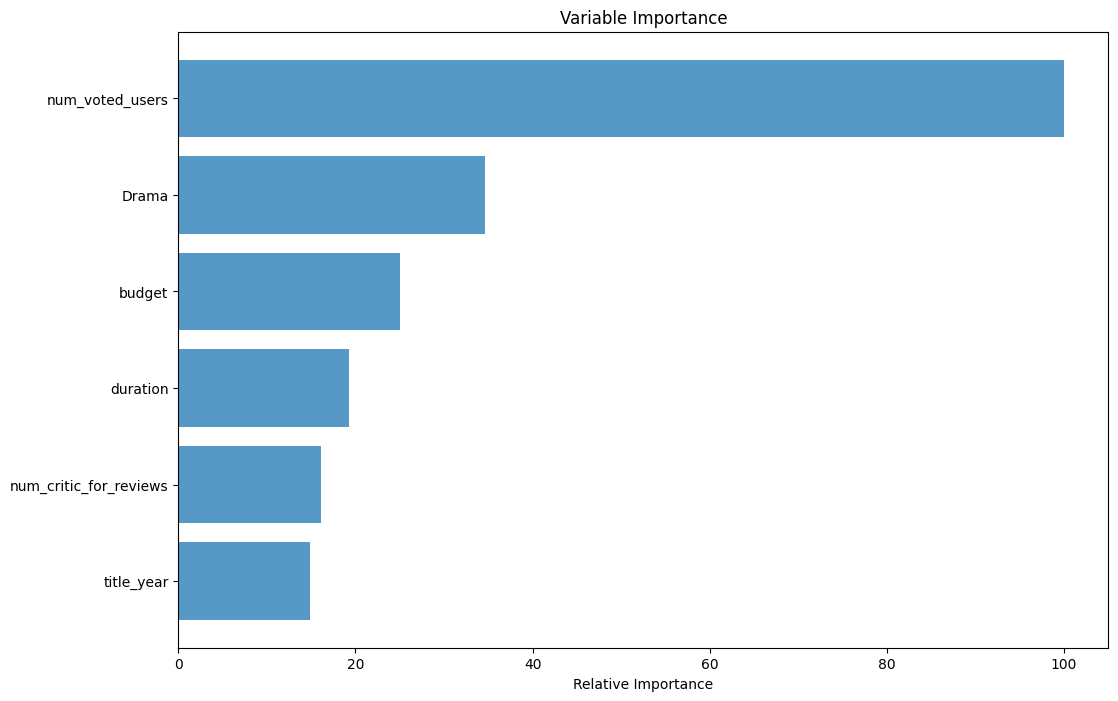

In [48]:
# Plot feature importance
feature_importance = Best_GBT.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 6

plt.figure(figsize = [12, 8])
plt.barh(pos[-num_feat:], feature_importance[sorted_idx][-num_feat:], align='center', alpha = 0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**Comparing results of Decision Tree, Random Forest and Gradient Boosted Trees**

In [49]:
models = [Best_CART, Best_RF, Best_GBT]
errors = [RMSE(m, X_test, y_test) for m in models]

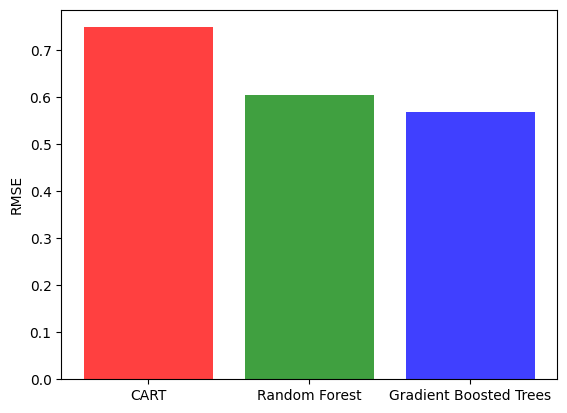

In [50]:
plt.bar(['CART','Random Forest','Gradient Boosted Trees'], errors, color = ['red', 'green', 'blue'], alpha = 0.75)
plt.ylabel('RMSE');

In [51]:
# from sklearn.metrics import mean_squared_error